# Análisis de los datos covid con pandas

Conocimientos previos de Python recomendables:

  - [Booleanos](../../python/booleanos.ipynb)
  - [Control de flujo](../../python/control_de_flujo.ipynb)
  - [Bloques e indentación](../../python/bloques_e_indentacion.ipynb)
  - [Listas y secuencias](../../python/secuencias.ipynb)
  - [Diccionarios](../../python/diccionarios.ipynb)
  - [Modulos](../../python/modulos.ipynb)
  - [funciones](../../python/funciones.ipynb)
  - [variables](../../python/tipos_y_variables.ipynb)
  
Conocimientos previos de análisis de datos en Python recomendables:

  - [Herramientas](../../analisis/herramientas.ipynb)
  - [Numpy](../../analisis/numpy.ipynb)
  - [Pandas](../../analisis/pandas.ipynb)
  - [Matplotlib](../../analisis/matplotlib.ipynb)

# Lectura del fichero


In [1]:
from pathlib import Path
import pandas

covid_csv_path = Path('..') / 'downloaded_data' / 'casos_hosp_uci_def_sexo_edad_provres.csv'
dframe = pandas.read_csv(covid_csv_path, delimiter=',', parse_dates=['fecha'], index_col='fecha')
print(dframe.shape)
dframe

(1267230, 7)


,provincia_iso,sexo,grupo_edad,num_casos,num_hosp,num_uci,num_def
fecha,,,,,,,
2020-01-01,A,H,0-9,0,0,0,0
2020-01-01,A,H,10-19,0,0,0,0
2020-01-01,A,H,20-29,0,0,0,0
2020-01-01,A,H,30-39,0,0,0,0
2020-01-01,A,H,40-49,0,0,0,0
...,...,...,...,...,...,...,...
2022-03-07,ZA,NC,50-59,0,0,0,0
2022-03-07,ZA,NC,60-69,0,0,0,0
2022-03-07,ZA,NC,70-79,0,0,0,0


# Evolución a lo largo del tiempo

In [2]:
dframe_por_fecha = dframe.groupby(by='fecha').sum()
dframe_por_fecha

,num_casos,num_hosp,num_uci,num_def
fecha,,,,
2020-01-01,0,8,0,0
2020-01-02,0,69,1,0
2020-01-03,0,8,1,0
2020-01-04,0,7,0,0
2020-01-05,0,7,0,0
...,...,...,...,...
2022-03-03,17759,242,14,40
2022-03-04,14689,187,6,14
2022-03-05,5943,126,6,12


# Gráficas con pandas

<AxesSubplot:xlabel='fecha'>

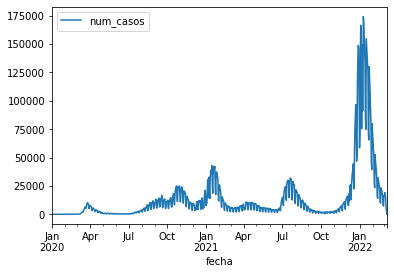

In [3]:
dframe_por_fecha.plot(y='num_casos')

<AxesSubplot:xlabel='fecha'>

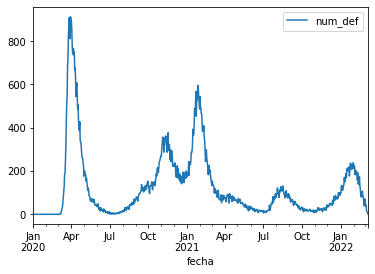

In [4]:
dframe_por_fecha.plot(y='num_def')

# Gráficas con matplotlib

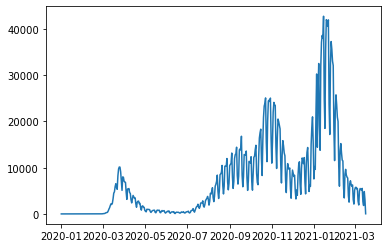

In [30]:
from matplotlib import pyplot as plt

plt.plot(dframe_por_fecha.index, dframe_por_fecha['num_casos'])

# Suma de datos semanales

<AxesSubplot:xlabel='fecha'>

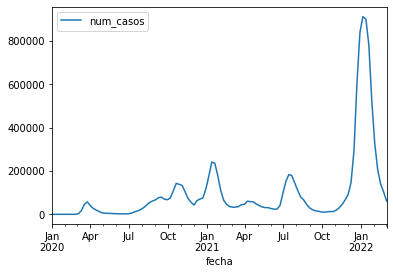

In [5]:
dframe_semanal = dframe.resample("7D").sum()
dframe_semanal.plot(y='num_casos')

# Selección de una ola

<AxesSubplot:xlabel='fecha'>

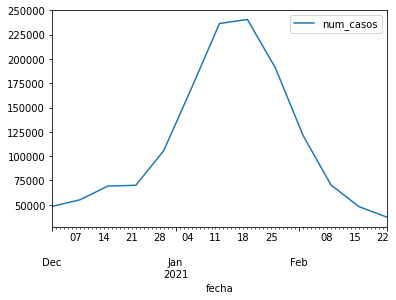

In [11]:
from datetime import datetime
date0 = datetime(year=2020, month=12, day=1)
date1 = datetime(year=2021, month=3, day=1)
# seleccionamos indexando por fecha
tercera_ola = dframe.loc[date0:date1, :]
tercera_ola.resample('7D').sum().plot(y='num_casos')

# Análisis de una provincia

['A' 'AB' 'AL' 'AV' 'B' 'BA' 'BI' 'BU' 'C' 'CA' 'CC' 'CE' 'CO' 'CR' 'CS'
 'CU' 'GC' 'GI' 'GR' 'GU' 'H' 'HU' 'J' 'L' 'LE' 'LO' 'LU' 'M' 'MA' 'ML'
 'MU' nan 'NC' 'O' 'OR' 'P' 'PM' 'PO' 'S' 'SA' 'SE' 'SG' 'SO' 'SS' 'T'
 'TE' 'TF' 'TO' 'V' 'VA' 'VI' 'Z' 'ZA']


<AxesSubplot:xlabel='fecha'>

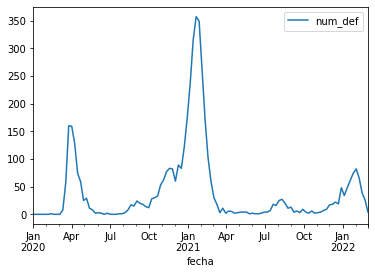

In [18]:
print(dframe['provincia_iso'].unique())
#filtramos por provincia
valencia = dframe[dframe['provincia_iso']=='V']
valencia = valencia.resample('7D').sum()
valencia.plot(y='num_def')

# Selección de un sexo o grupo de edad

['0-9' '10-19' '20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80+' 'NC']


<AxesSubplot:xlabel='fecha'>

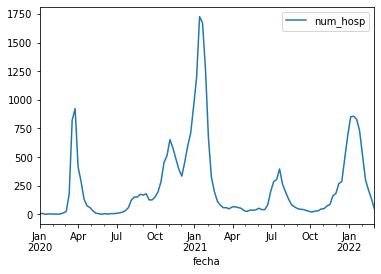

In [23]:
print(dframe['grupo_edad'].unique())
ninyos = dframe[dframe['grupo_edad']=='0-9']
ninyos = valencia.resample('7D').sum()
ninyos.plot(y='num_hosp')

# Incidencia acumulada por provincia

<AxesSubplot:xlabel='provincia_iso'>

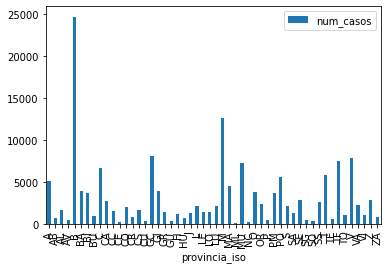

In [24]:
from datetime import datetime, timedelta
now = datetime.now()
quince_dias = timedelta(days=15)
casos_desde_hace_quince_dias = dframe.loc[now-quince_dias:now, ('provincia_iso', 'num_casos')]
casos_por_provincia = casos_desde_hace_quince_dias.groupby(by='provincia_iso').sum()
casos_por_provincia.plot.bar()

# Casos en los últimos 15 días por grupo de edad

<AxesSubplot:xlabel='grupo_edad'>

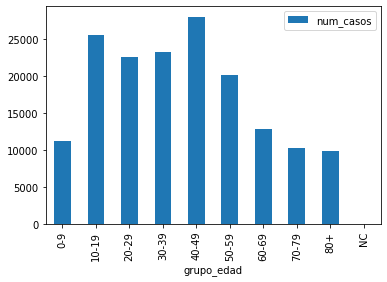

In [25]:
from datetime import datetime, timedelta
now = datetime.now()
quince_dias = timedelta(days=15)
casos_desde_hace_quince_dias = dframe.loc[now-quince_dias:now, ('grupo_edad', 'num_casos')]
casos_por_provincia = casos_desde_hace_quince_dias.groupby(by='grupo_edad').sum()
casos_por_provincia.plot.bar()


# Casos en el último mes en Valencia

<AxesSubplot:xlabel='fecha'>

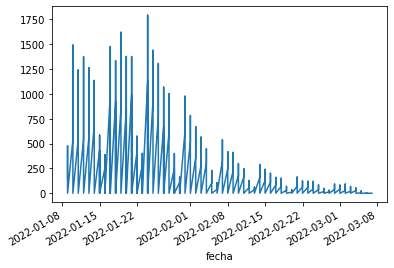

In [26]:
from datetime import datetime, timedelta

valencia_dframe = dframe[dframe['provincia_iso'] == 'V']

now = datetime.now()
mes = timedelta(days=60)

valencia_ultimo_mes = valencia_dframe.loc[now-mes:now, 'num_casos']
valencia_ultimo_mes.plot()

<AxesSubplot:xlabel='fecha'>

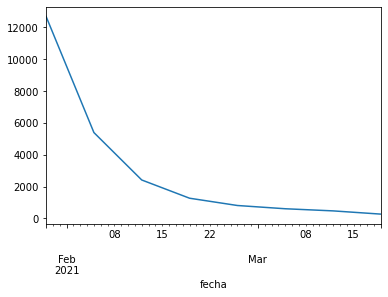

In [17]:
valencia_ultimo_mes.resample('7D').sum().plot(y='num_casos')

<AxesSubplot:xlabel='fecha'>

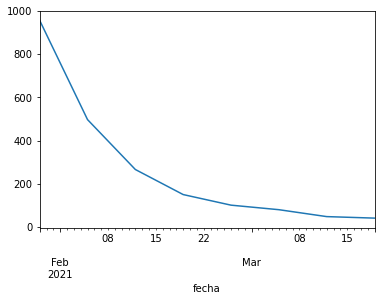

In [24]:
valencia_dframe.loc[now-mes:now, 'num_hosp'].resample('7D').sum().plot()

# Comparación por provincias

<AxesSubplot:xlabel='provincia_iso'>

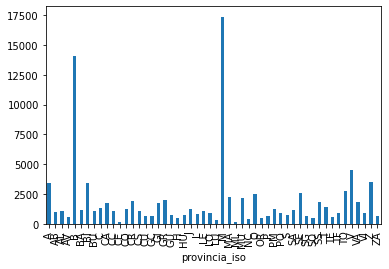

In [35]:
casos_por_provincia = dframe.groupby(by='provincia_iso').sum()
casos_por_provincia['num_def'].plot.bar()

# Comparación por olas

Text(0.5, 0, 'ola')

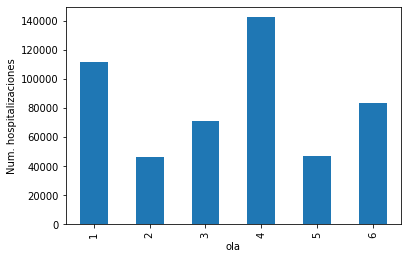

In [49]:
limites_entre_olas = [
    datetime(2020, 7, 15),
    datetime(2020, 10, 11),
    datetime(2020, 12, 20),
    datetime(2021, 6, 18),
    datetime(2021, 10, 31),
    datetime.now(),
]

def calcular_num_ola_dada_fecha(fecha):
    for idx, limite in enumerate(limites_entre_olas):
        if fecha <= limite:
            return idx + 1

num_ola_para_fechas = [calcular_num_ola_dada_fecha(fecha) for fecha in dframe.index]
datos_por_olas = dframe.groupby(by=num_ola_para_fechas).sum()
axes_suplot = datos_por_olas['num_hosp'].plot.bar()
axes_suplot.set_ylabel('Num. hospitalizaciones')
axes_suplot.set_xlabel('ola')
